In [1]:
from pathlib import Path
from fastai.data.block import DataBlock
from fastai.data.transforms import RandomSplitter, get_files
from fastai.data.core import DataLoaders
from fastai.learner import Learner
from audiocrush.data import AudioBlock, get_audio_files
from fastai.data.block import CategoryBlock
from fastai.data.transforms import parent_label 
from audiocrush.models.resnet_model import ResNet
from audiocrush.models.models import *
import torch.nn.functional as F

from fastai.callback.schedule import fit_one_cycle
from fastai.metrics import accuracy

from audiocrush.augment import *

In [2]:



data_root_path = Path('C:/Data/Instruments')

item_tfms = [
    # RandomNoise()
]

batch_tfms = [
    # RandomResample,
]

# Define your DataBlock
audio_data_block = DataBlock(
    blocks=(AudioBlock(sample_rate=32000), CategoryBlock),
    get_items=get_audio_files,  # A function to get all audio file paths
    splitter=RandomSplitter(valid_pct=0.2, seed=5),
    get_y=parent_label,  # Assumes that the parent folder name is the label
    # item_tfms=item_tfms,
    # batch_tfms=batch_tfms
)

dls = audio_data_block.dataloaders(data_root_path, bs=32)

loaded file: Hihat Closed Black Hole 2.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Black Hole 2.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Black Hole 2.wav
loaded file: Hihat Closed Black Hole 2.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Black Hole 2.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Black Hole 2.wav


c:\Dev\crush\audiocrush\data.py:71: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:212.)
  audio_data = torch.from_numpy(audio_data).to(torch.float32)
c:\Users\Martin\.conda\envs\crush\Lib\site-packages\torch\utils\data\_utils\collate.py:250: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:315.)
  if elem.is_nested:


In [3]:
from fastai.torch_core import defaults
defaults
# defaults.device
defaults.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
defaults.device

device(type='cuda')

In [4]:
# dls.show_batch(max_n=9)

loaded file: Hihat Closed Blue Room 1.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Blue Room 1.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Blue Room 1.wav
loaded file: Hihat Closed Confidential.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Confidential.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Confidential.wav
loaded file: Hihat Closed Hearty.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Hearty.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Hearty.wav
loaded file: Kick Chatt.raw_s16le_32000hz_16bits_1ch
got file: Kick Chatt.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Chatt.wav
loaded file: Hihat Closed Rude.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Rude.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Rude.wav
loaded file: Snare Clap Days Off.raw_s16le_32000hz_16bits_1ch
got file: Snare Clap Days Off.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare

c:\dev\crush\fastai\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs)


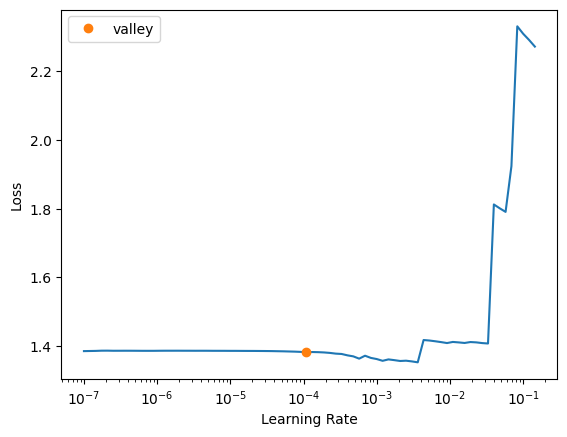

In [5]:



# model = ConvModelSimple(num_classes=4)
model = ConvModelSimple5(num_classes=4)

learn = Learner(dls, model, loss_func=F.cross_entropy, metrics=accuracy)

lr = learn.lr_find()



In [6]:
# import torch.profiler

# with torch.profiler.profile(
#     activities=[
#         torch.profiler.ProfilerActivity.CPU,
#         torch.profiler.ProfilerActivity.CUDA],
#     on_trace_ready=torch.profiler.tensorboard_trace_handler('./log'),
#     record_shapes=True,
#     with_stack=True
# ) as prof:
    # learn.fit_one_cycle(lr_max=1e-2, n_epoch=1)

# print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

In [7]:
# print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

In [8]:
# prof.export_chrome_trace("trace.json")

In [9]:
# lr = 5e-6
lr = 1e-4

In [10]:
print(f"DataLoaders device: {dls.device}")
print(dls.after_batch)
dls.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"DataLoaders device: {dls.device}")
print(dls.after_batch)

DataLoaders device: cuda:0
Pipeline: 
DataLoaders device: cuda
Pipeline: 


In [11]:
# learn.fit_one_cycle(lr_max=lr, n_epoch=1)

loaded file: Hihat Foot Soft.raw_s16le_32000hz_16bits_1ch
got file: Hihat Foot Soft.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Foot Soft.wav
loaded file: Hihat Open Late Nite.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Late Nite.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Late Nite.wav
loaded file: Hihat Closed Pointy Hat.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Pointy Hat.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Pointy Hat.wav
loaded file: Kick Dirt Lange.raw_s16le_32000hz_16bits_1ch
got file: Kick Dirt Lange.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Dirt Lange.wav
loaded file: Hihat Closed Alien Fash.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Alien Fash.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Alien Fash.wav
loaded file: Hihat Open Vinyl SP 1.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Vinyl SP 1.raw_s16le_32000hz_16bits_1ch C:\Data\Instrument

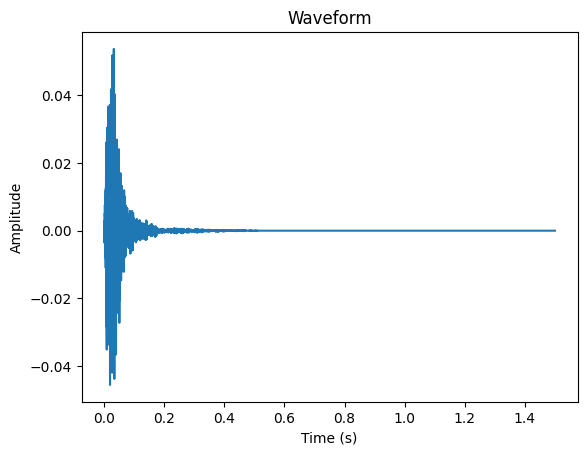

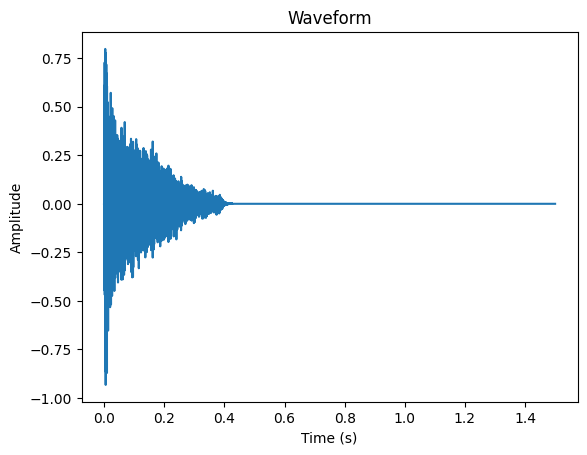

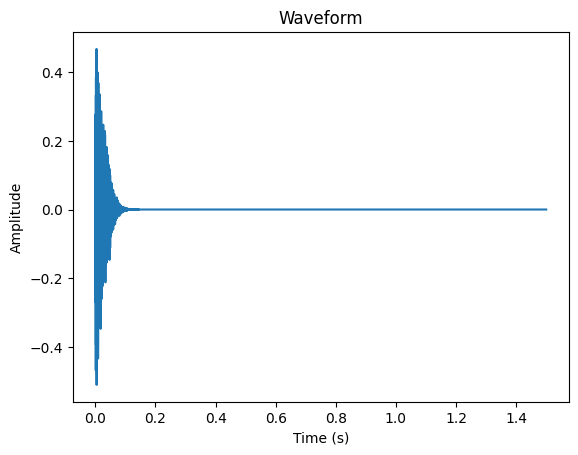

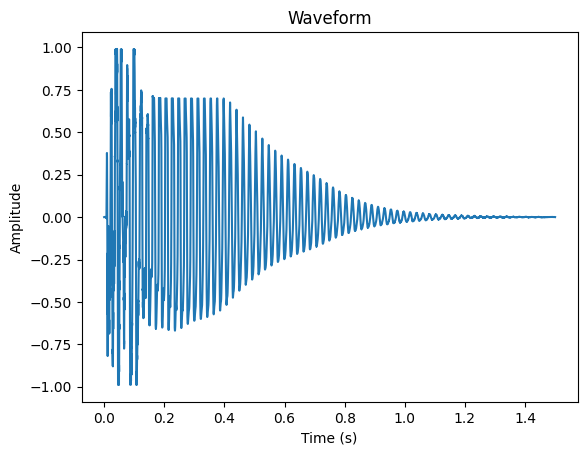

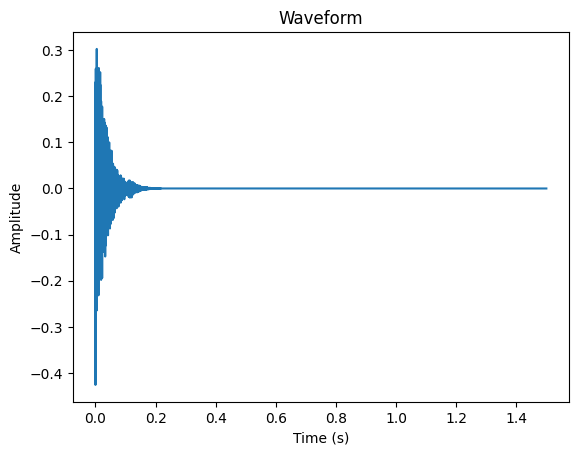

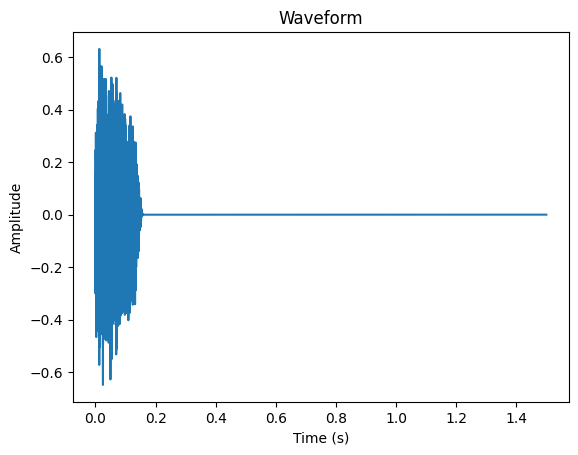

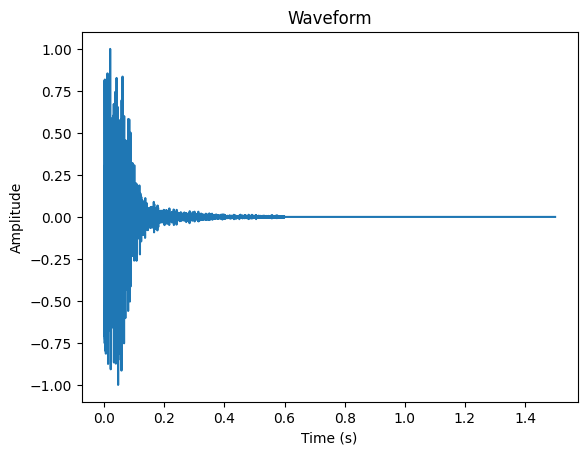

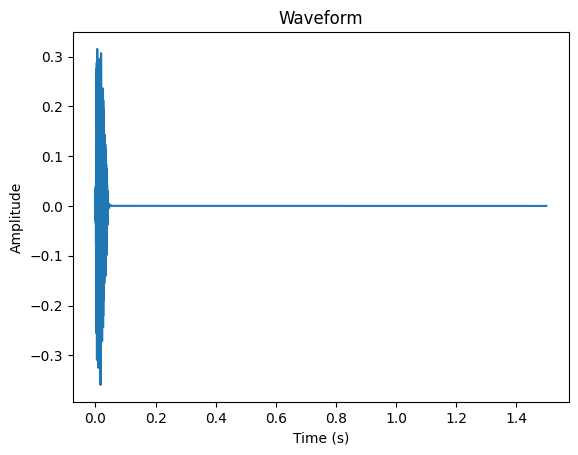

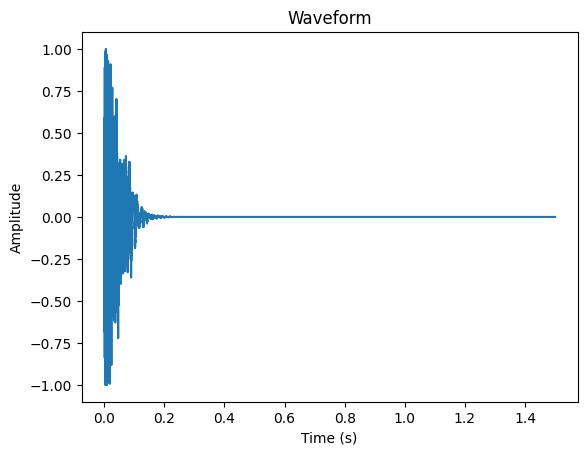

Hihat
Hihat
Hihat
Kick
Hihat
Hihat
Clap
Hihat
Snare


In [12]:
dls.show_batch()

In [13]:
print(f"torch version: {torch.__version__}")
print(f"torchaudio version: {torchaudio.__version__}")

import torch
import torchaudio

# Generate a random waveform
waveform = torch.randn(1, 32000).to('cuda')  # Shape: (channels, samples)

# Define the resampler
resampler = torchaudio.transforms.Resample(
    orig_freq=32000,
    new_freq=28000,
).to('cuda')

# Apply resampler
resampled_waveform = resampler(waveform)

print(f"Resampled waveform device: {resampled_waveform.device}")

torch version: 2.5.1+cu118
torchaudio version: 2.5.1+cu118
Resampled waveform device: cuda:0


In [14]:
learn.fit_one_cycle(lr_max=lr, n_epoch=7)

loaded file: Hihat Closed Charred 2.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Charred 2.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Charred 2.wav
loaded file: Hihat Closed Teen.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Teen.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Teen.wav
loaded file: Kick Alien Spawn 1.raw_s16le_32000hz_16bits_1ch
got file: Kick Alien Spawn 1.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Alien Spawn 1.wav
loaded file: Kick Vinyl 70s.raw_s16le_32000hz_16bits_1ch
got file: Kick Vinyl 70s.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Vinyl 70s.wav
loaded file: Hihat Closed 505 ASR.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed 505 ASR.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed 505 ASR.wav
loaded file: Clap Last Min.raw_s16le_32000hz_16bits_1ch
got file: Clap Last Min.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Clap\Clap Last Min.wav
loaded 

In [15]:
from fastai.interpret import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
# 
interp.vocab
interp.print_classification_report()
interp.plot_top_losses(k=10)

print(interp.most_confused(min_val=5))

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.show_results(idxs=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], nrows=2, ncols=5)


loaded file: Snare 909 Tune 10s.raw_s16le_32000hz_16bits_1ch
got file: Snare 909 Tune 10s.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare 909 Tune 10s.wav
loaded file: Hihat Open Trad.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Trad.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Trad.wav
loaded file: Hihat Open Dizzy.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Dizzy.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Dizzy.wav
loaded file: Kick Marching Drum.raw_s16le_32000hz_16bits_1ch
got file: Kick Marching Drum.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Marching Drum.wav
loaded file: Snare Gram.raw_s16le_32000hz_16bits_1ch
got file: Snare Gram.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare Gram.wav
loaded file: Snare Noise Hard.raw_s16le_32000hz_16bits_1ch
got file: Snare Noise Hard.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare Noise Hard.wav
loaded file: Hihat Closed 80s UK Disco

loaded file: Snare 909 Tune 10s.raw_s16le_32000hz_16bits_1ch
got file: Snare 909 Tune 10s.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare 909 Tune 10s.wav
loaded file: Hihat Open Trad.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Trad.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Trad.wav
loaded file: Hihat Open Dizzy.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Dizzy.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Dizzy.wav
loaded file: Kick Marching Drum.raw_s16le_32000hz_16bits_1ch
got file: Kick Marching Drum.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Marching Drum.wav
loaded file: Snare Gram.raw_s16le_32000hz_16bits_1ch
got file: Snare Gram.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare Gram.wav
loaded file: Snare Noise Hard.raw_s16le_32000hz_16bits_1ch
got file: Snare Noise Hard.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Snare\Snare Noise Hard.wav
loaded file: Hihat Closed 80s UK Disco

AssertionError: eh

In [ ]:
xb, yb = dls.one_batch()
print(xb.shape, yb.shape)
print(xb, yb)

In [ ]:
preds, targs = learn.get_preds()
decoded_preds = preds.argmax(dim=1)

print(decoded_preds.shape, targs.shape) 

xb, yb = learn.dls.valid.one_batch()
print(xb.shape, yb.shape)

In [ ]:
learn.fit_one_cycle(lr_max=lr, n_epoch=1)

In [16]:
learn.fit_one_cycle(lr_max=lr, n_epoch=500)

loaded file: Hihat Closed Stick Tip Hard 2.raw_s16le_32000hz_16bits_1ch
got file: Hihat Closed Stick Tip Hard 2.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Closed Stick Tip Hard 2.wav
loaded file: Hihat Open Nineoh.raw_s16le_32000hz_16bits_1ch
got file: Hihat Open Nineoh.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Open Nineoh.wav
loaded file: Kick Ironman.raw_s16le_32000hz_16bits_1ch
got file: Kick Ironman.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Ironman.wav
loaded file: Kick Dirt Distortion.raw_s16le_32000hz_16bits_1ch
got file: Kick Dirt Distortion.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick Dirt Distortion.wav
loaded file: Hihat Foot Hard.raw_s16le_32000hz_16bits_1ch
got file: Hihat Foot Hard.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Hihat\Hihat Foot Hard.wav
loaded file: Kick 505.raw_s16le_32000hz_16bits_1ch
got file: Kick 505.raw_s16le_32000hz_16bits_1ch C:\Data\Instruments\Kick\Kick 505.wav
loaded file: Kic

KeyboardInterrupt: 